Makaylah Cowan

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pca_cov import PCA_COV

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA` object called `pca` based on the DataFrame object that you just created.

In [2]:
# Read in iris dataset as pandas dataframe
iris = pd.read_csv("Iris.csv")
print(iris.head())

# Create PCA Object called pca
pca = PCA_COV(iris)



   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [3]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape}')
print(f'Your covariance matrix is:\n{cov_mat}')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.07359 -0.06483  0.10006]
 [-0.06483  0.98552 -0.03553]
 [ 0.10006 -0.03553  0.97774]]


#### (ii) Tes `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [4]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)}')
print(f'Your proportion variance list begins with\n{prop_var[:2]}')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [5]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)}')
print(f'Your cumulative variance list begins with\n{accum_var[:2]}')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [6]:
# Test pca (no normalization) here
iris_headers = list(iris.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA.')
print(f'The original PCA data has shape {pca.A.shape}.')
print(f'Eigenvector shape: {pca.e_vecs.shape}.\nEigenvalue shape: {pca.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())}.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars} ")
print(f'Your eigenvectors:\n{pca.e_vecs}.')
print(f'Your eigenvalues:\n{pca.e_vals}.')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}.')



<class 'pandas.core.frame.DataFrame'>
There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (149, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion

In [7]:
# Test pca (normalization) here
iris_headers = list(iris.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA.')
print(f'The original PCA data has shape {pca.A.shape}.')
print(f'Eigenvector shape: {pca.e_vecs.shape}.\nEigenvalue shape: {pca.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())}.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()}')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}.')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}.')

<class 'pandas.core.frame.DataFrame'>
There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (149, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315432, 0.9588784639918417, 0.9936140780797743, 1.0000000000000002]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

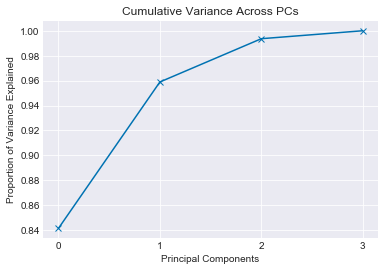

In [8]:
# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:**
I would drop the last principal component and maybe the third as well because they do not explain very much variance in the data. The first and second principal component explain 96% of the data which is a good amount and more than enough to properly reconstruct the data. 

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [9]:
data = pca.pca_project([0, 1])


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

Text(0, 0.5, 'Second Principal Component')

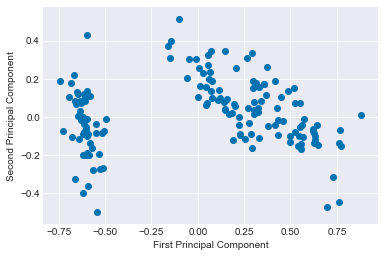

In [10]:
p = plt.scatter(data[:,0],data[:,1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")


### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC0)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

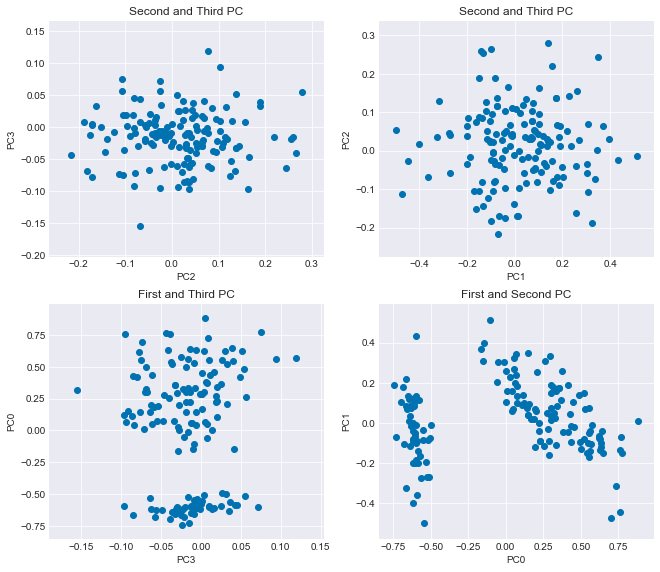

In [11]:
fig, axs = plt.subplots(2, 2)

data = pca.pca_project([2, 3])
axs[0, 0].scatter(data[:,0],data[:,1])
axs[0, 0].set_xlabel("PC2")
axs[0, 0].set_ylabel("PC3")
axs[0, 0].set_title("Second and Third PC")

data1 = pca.pca_project([1, 2])
axs[0, 1].scatter(data1[:,0],data1[:,1])
axs[0, 1].set_xlabel("PC1")
axs[0, 1].set_ylabel("PC2")
axs[0, 1].set_title("Second and Third PC")

data2 = pca.pca_project([3, 0])
axs[1,0 ].scatter(data2[:,0],data2[:,1])
axs[1,0 ].set_xlabel("PC3")
axs[1,0 ].set_ylabel("PC0")
axs[1, 0].set_title("First and Third PC")


data3 = pca.pca_project([0, 1])
axs[1, 1].scatter(data3[:,0],data3[:,1])
axs[1, 1].set_xlabel("PC0")
axs[1, 1].set_ylabel("PC1")
axs[1, 1].set_title("First and Second PC")

plt.subplots_adjust(left=-.5, bottom=-.5, right=.9, top=1.3, wspace=.2, hspace=.2)

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:**
These plots show us that some PCS are more important than others for separating data (and capturing variation). The top two graphs do not do a good job of separating the data while the ones on the bottom do. The difference between those sets of graphs is that the bottom's graphs have the first principal component in them. We can conclude that the first principal component is the most important PC and can separate the data on its own. Between the two bottom graphs, the one of the left is more separated; it graphs the first and second PC, so while the first principal component is enough to separate the data, having the second with it further helps to define the groups.

### 1d) Loading plot (or heatmap for sections A/C)

Visualize how the top two principal components relate to original data variables.

- Implement `loading_plot` (or heatmap for sections A/C) in `pca_cov.py`

#### Test `loading_plot` (or heatmap for sections A/C)

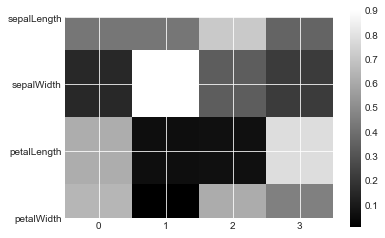

In [12]:
pca.loading_plot()
plt.show()



**Question 3:** What do the loadings (or heatmap for sections A/C) tell us what the first two PCs measure, with respect to the original data axes?

**Question 3 answer:** The heatmap shows us what variables in the dataset affect the variation captured by the principal components. For example, petal length and petal width vary a lot, thus they are light for the first principal component. The second principal component shows us that sepal width varies a lot in that direction and sepal length does too, somewhat.



**Question 4:** What do the loadings (or heatmap for sections A/C) tell us about correlations among the original data axes?

**Question 4 answer:** The heatmap shows which variables vary in similar ways to others and which ones are unaffected by each other. For example, the first principal component shows that all but sepal width varies in that direction, so the other three variables may be more related. The second principal component shows us variation in another direction that only really affects sepal length and sepal width, so they may be related in some way.




### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables 'sepalLength', 'sepalWidth' of the Iris data **normalized separately**.
- In the 2nd cell below, do PCA on the normalized Iris data and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables ('sepalLength', 'sepalWidth' — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

Text(0, 0.5, 'Sepal_Width')

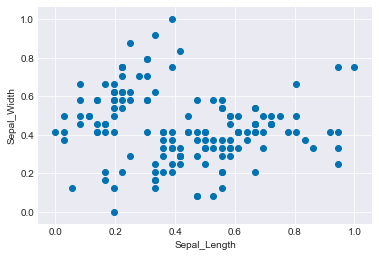

In [13]:
# Plot original iris data normal
# normalize data
normiris = (iris - np.min(iris)) / (np.max(iris) - np.min(iris))

# plot
plt.scatter(normiris["sepalLength"], normiris["sepalWidth"])
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")

<class 'pandas.core.frame.DataFrame'>


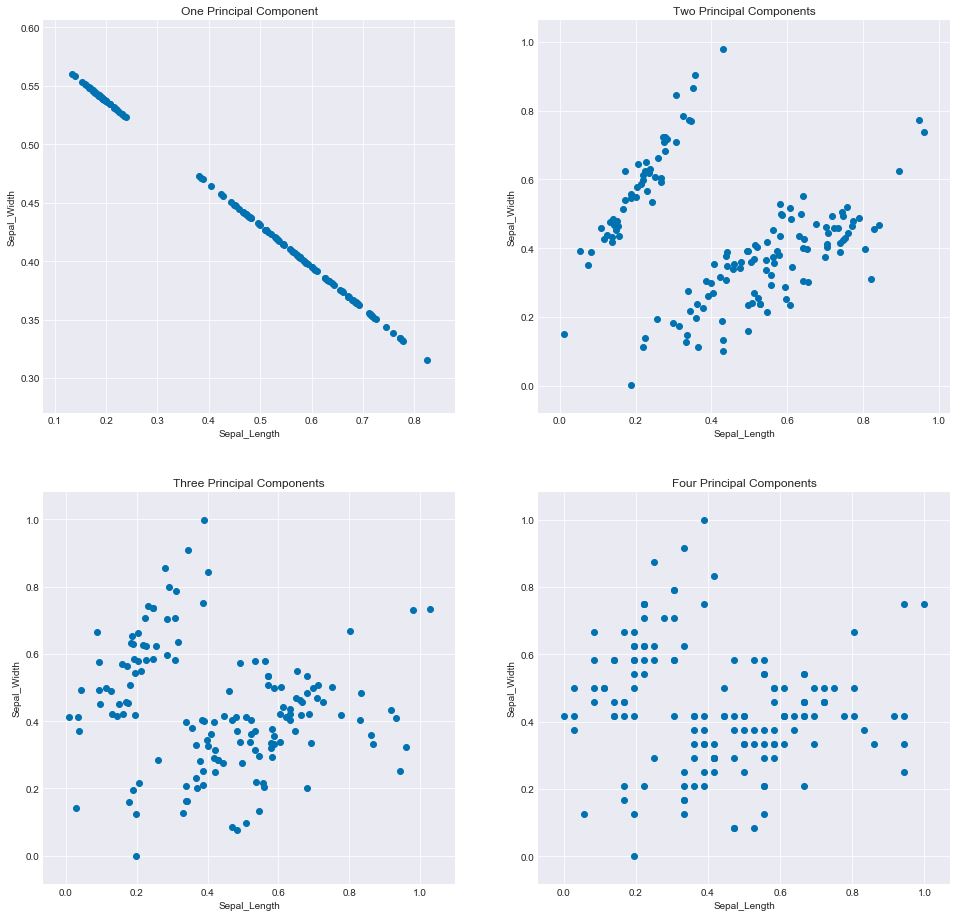

In [14]:
# pca of segmented data
pca2 = PCA_COV(iris)
iris_headers = list(iris.columns[:-1])
pca2.pca(iris_headers, True)


# 2x2 grid of scatter plots
fig, axss = plt.subplots(2, 2)

data = pca2.pca_then_project_back(1)
axss[0, 0].scatter(data[:,0],data[:,1])
axss[0, 0].set_xlabel("Sepal_Length")
axss[0, 0].set_ylabel("Sepal_Width")
axss[0, 0].set_title("One Principal Component")

data1 = pca2.pca_then_project_back(2)
axss[0, 1].scatter(data1[:,0],data1[:,1])
axss[0, 1].set_xlabel("Sepal_Length")
axss[0, 1].set_ylabel("Sepal_Width")
axss[0, 1].set_title("Two Principal Components")

data2 = pca2.pca_then_project_back(3)
axss[1, 0].scatter(data2[:,0],data2[:,1])
axss[1, 0].set_xlabel("Sepal_Length")
axss[1, 0].set_ylabel("Sepal_Width")
axss[1, 0].set_title("Three Principal Components")


data3 = pca2.pca_then_project_back(4)
axss[1, 1].scatter(data3[:,0],data3[:,1])
axss[1, 1].set_xlabel("Sepal_Length")
axss[1, 1].set_ylabel("Sepal_Width")
axss[1, 1].set_title("Four Principal Components")

plt.subplots_adjust(left=-1.2, bottom=-1.1, right=.9, top=1.9, wspace=.2, hspace=.2)


**Question 5:** How well does each of the re-projections compress the original data? Briefly interpret what the above 2x2 grid means.

**Question 5 answer:** Each grid is step closer to the original data. This is because each principal component represents some of the variation in the data. From these graphs, we can see that just having two principal components gets us pretty close to what the original data, but adding the other two components in (bottom level) refines the data more and shows more of its variation.The first projection, with only one principal component, compresses the data too much to where we are not able to revert back to even close to the data's original shape.

## Task 2: PCA on Australia dataset and one other dataset

Do PCA on:
- the Australia dataset
- one other dataet of your choice

In the cells below, include at minimum

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

### 2a) Australia dataset PCA

Do a PCA (**with data normalization**), but include only the following variables in the data matrix:

    premin, premax, salmin, salmax, minairtemp, maxairtemp, minsst, maxsst, minsoilmoist, maxsoilmoist, and runoffnew

<class 'pandas.core.frame.DataFrame'>
All Variables


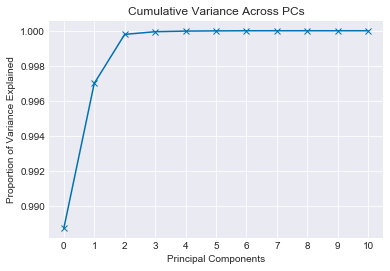

Chosen Variables


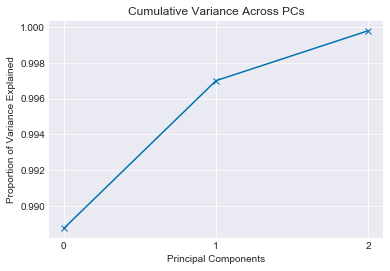

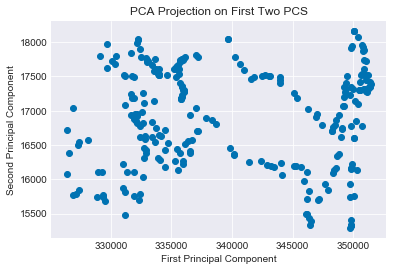

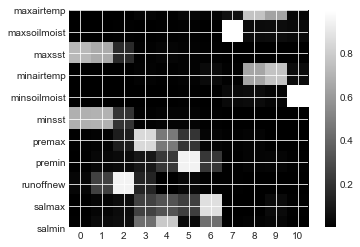

In [15]:
# Add data and create object
Aus = pd.read_csv("AustraliaCoast.csv")
cutAus = Aus[Aus.columns.difference(['Id', "Longitude", 'Latitude',"Continent", "Basin_id", "Cell_locat", "evapproxy", 'stddev_elevdepth', 'Min_czcs', 'Max_czcs', 'Wave_heigh', 'Tideformproxy'])]

pca3 = PCA_COV(cutAus)
Aus_headers = list(cutAus.columns[:-1])
Aus_headers.append(cutAus.columns[-1])

#DO PCA
pca3.pca(Aus_headers)

print("All Variables")
pca3.elbow_plot() 
plt.show()

print("Chosen Variables")
pca3.elbow_plot(3) 
plt.show()

projec = pca3.pca_project([0, 1])
t = plt.scatter(projec[:,0],projec[:,1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Projection on First Two PCS")
plt.show()

heat = pca3.loading_plot()
plt.show()


*Written description of your choice of number of PCs preserved and why:*

I decided to keep the first three PCs for the eblow plot because those alone capture 100% of the variance in the data. It would have sufficed, even, to just keep the first PC because it captures almost 99% of the variation.

 
*Interpret the meaning of first two vectors in the heatmap:*
The first principal component shows that maxsst and minsst have the most variation across the dataset. The second principal component shows that not only do they have a strong relationship, runoffnew also contributed to some of the variation.



### 2b) Other dataset PCA

**Make sure you describe what the dataset is, what variables are, where you got it.**

Include at minimum below:

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

<class 'pandas.core.frame.DataFrame'>


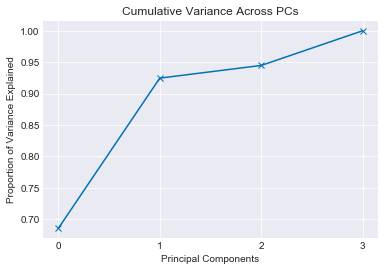

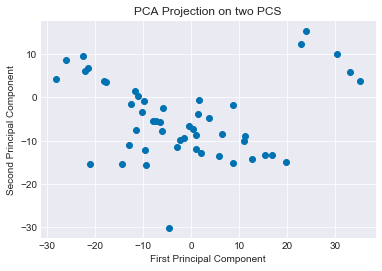

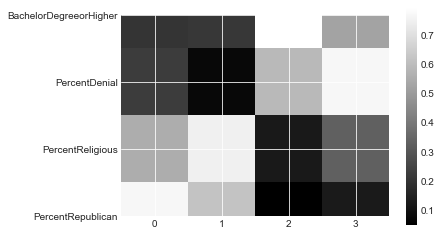

In [16]:
# Other dataset
# Add data and create object
CCDen = pd.read_csv("ClimateChangeDenial.csv")
CCDenCut = CCDen[CCDen.columns.difference(["States", 'Median Income', "ComparedtoNationalAverage","PoliticalParty", "MI(Categorical)"])]

pca4 = PCA_COV(CCDenCut)
CC_headers = list(CCDenCut.columns[:-1])
CC_headers.append(CCDenCut.columns[-1])


#DO PCA
pca4.pca(CC_headers)

pca4.elbow_plot() 
plt.show()

project = pca4.pca_project([0, 1])
t2 = plt.scatter(project[:,0],project[:,1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Projection on two PCS")
plt.show()

heat = pca4.loading_plot()
plt.show()

*Describe what the dataset is, what variables are, where you got it:*

This data set is about climate change denial in US states. It compiles percents of different factors that are generally related to increased/decreased climate change denial, including percent of people who self identify as highly religious (from Pew Research Center), percent of state that has a bachelor's degree or higher (from U.S Census Bureau), and percent of state that identifies as Republican (Pew Research Center).

*Written description of your choice of number of PCs preserved and why:*

I chose to keep all the principal components because with all four, you can keep about 100% of the variation in the data. If I had to take a principal component away, I would remove at once 2, so that the amount of variation maintained could remain above 0%.

*Interpret the meaning of first two vectors in the heatmap:*

The first and second principal component shows that most of the variation between state climate change denial is from political pary and being religious; this makes sense because both these two religion and political party are usually entertwined and have been proven to have some relationship with climate change denial.

